# Imports

In [15]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [16]:
n = 7
label_name = "stat3"
layers = [n*(n-1)//2, 2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [17]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [18]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 43.67867422103882
Epoch 1, Loss 43.39722120761871
Epoch 2, Loss 43.20417922735214
Epoch 3, Loss 42.921305537223816
Epoch 4, Loss 42.72088325023651
Epoch 5, Loss 42.508632600307465
Epoch 6, Loss 41.99248921871185
Epoch 7, Loss 41.7840873003006
Epoch 8, Loss 41.3499710559845
Epoch 9, Loss 40.999789237976074
Epoch 10, Loss 40.67456817626953
Epoch 11, Loss 40.084492325782776
Epoch 12, Loss 39.40777134895325
Epoch 13, Loss 38.99619269371033
Epoch 14, Loss 38.3727907538414
Epoch 15, Loss 38.03580665588379
Epoch 16, Loss 37.31836912035942
Epoch 17, Loss 36.541916996240616
Epoch 18, Loss 36.09243085980415
Epoch 19, Loss 35.67748698592186
Epoch 20, Loss 34.98945954442024
Epoch 21, Loss 34.80335921049118
Epoch 22, Loss 34.18039718270302
Epoch 23, Loss 33.87547841668129
Epoch 24, Loss 33.423945009708405
Epoch 25, Loss 32.78345248103142
Epoch 26, Loss 32.883914828300476
Epoch 27, Loss 32.47007283568382
Epoch 28, Loss 32.13805443048477
Epoch 29, Loss 32.219893515110016
Epoch 30, Loss 

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

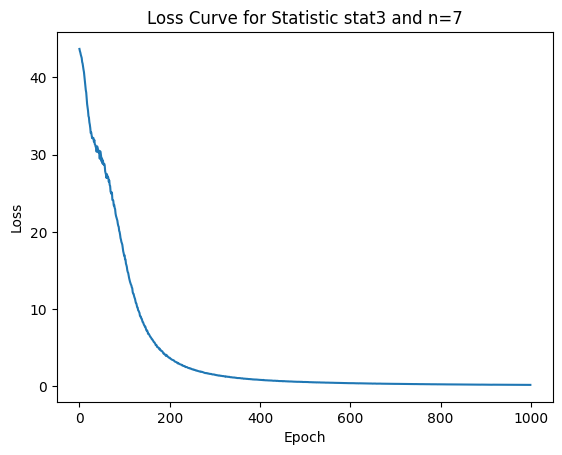

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot loss function
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Loss Curve for Statistic {label_name} and n={n}")
plt.show()
plt.savefig(f"figures/loss_curve_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


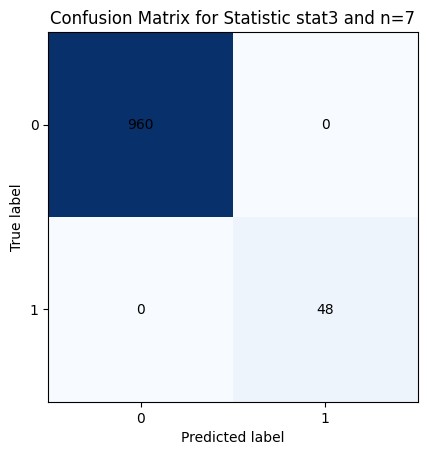

In [20]:
confusion_matrix = evaluate_model(model, test_dataset)
confusion_matrix.print_accuracy()
confusion_matrix.plot(title=f"Confusion Matrix for Statistic {label_name} and n={n}")

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

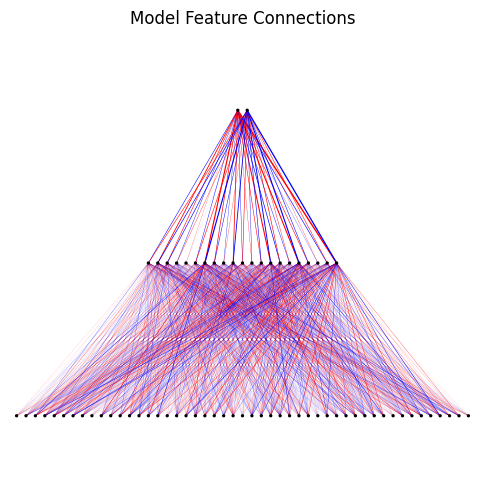

Layer 1


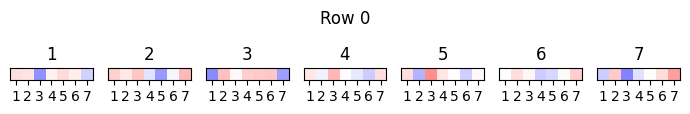

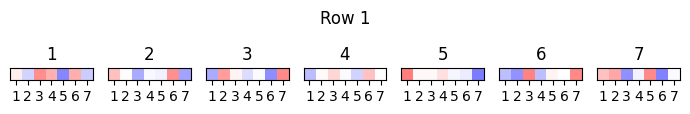

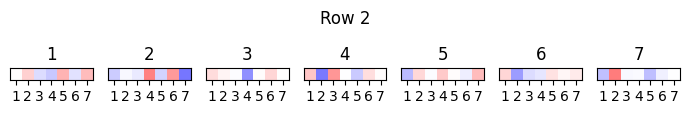

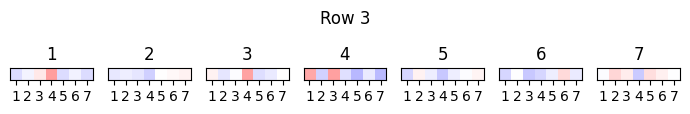

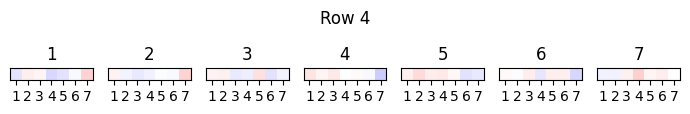

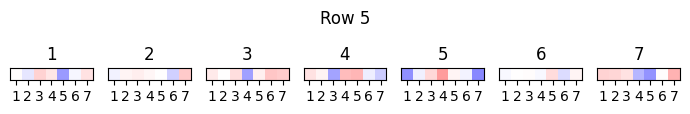

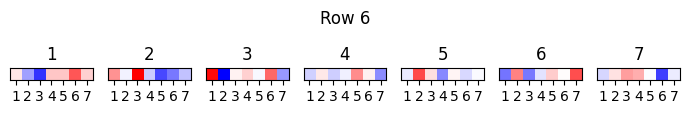

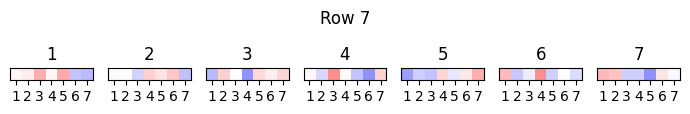

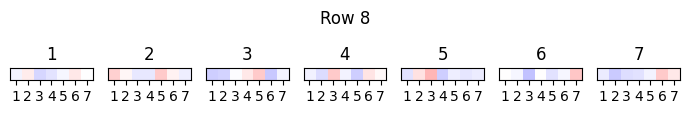

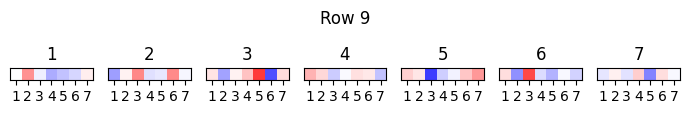

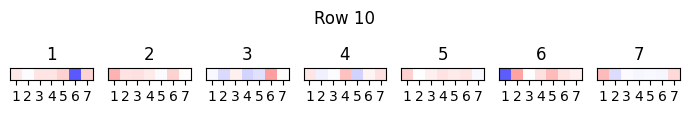

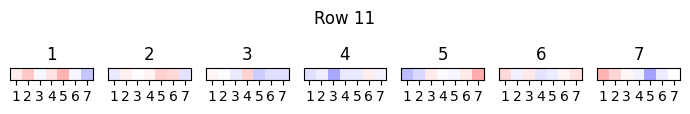

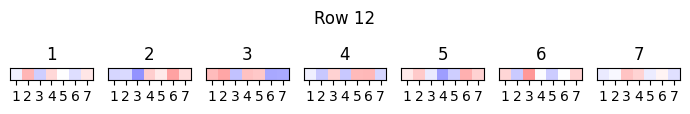

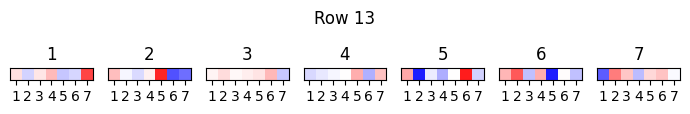

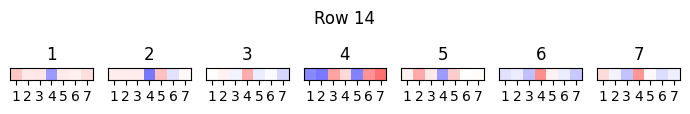

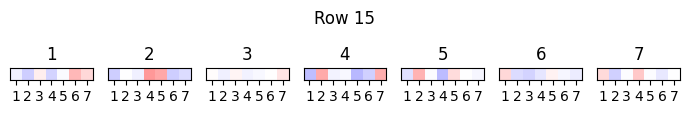

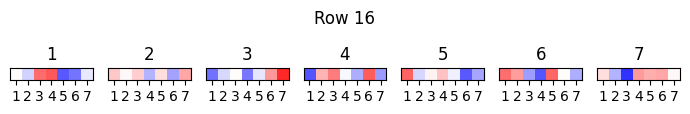

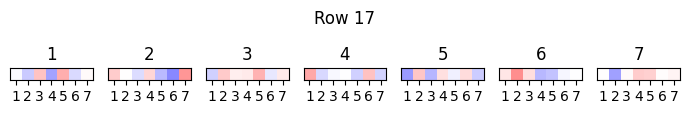

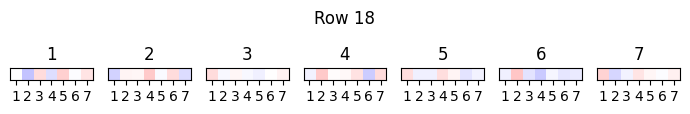

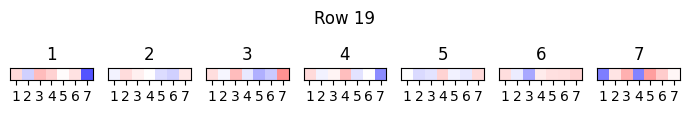

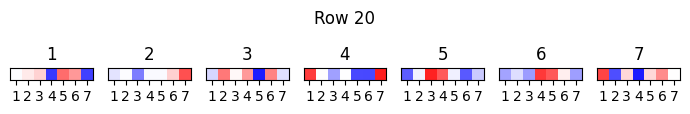

Layer 2


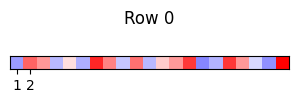

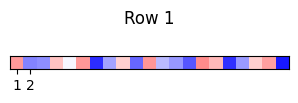

In [21]:
model.plot_connections()

for i in range(len(layers)):
    print(f"Layer {i + 1}")
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)